In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 1. Reading the Data

In [5]:
path = "https://raw.githubusercontent.com/gopalk167/Spam-Sms-Detection/main/SMSSpamCollection"

In [8]:
df = pd.read_csv(path, delimiter='\t', header=None)

In [9]:
df.columns = ['labels', 'sms']
df.head(3)

,labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
df['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [11]:
df.shape

(5572, 2)

In [12]:
# This is highly imbalanced dataset 

# 2. Text Pre-processing 

In [13]:
#normalizing all the tweets to lower case

for i in range(len(df.sms)):
    df.sms[i] = df.sms[i].lower()
    

In [14]:
# Checking for duplicates

df[df.duplicated()]

,labels,sms
103,ham,as per your request 'melle melle (oru minnamin...
154,ham,as per your request 'melle melle (oru minnamin...
207,ham,"as i entered my cabin my pa said, '' happy b'd..."
223,ham,"sorry, i'll call later"
326,ham,no calls..messages..missed calls
...,...,...
5524,spam,you are awarded a sipix digital camera! call 0...
5535,ham,"i know you are thinkin malaria. but relax, chi..."
5539,ham,just sleeping..and surfing
5553,ham,hahaha..use your brain dear


In [15]:
# Dropping the 404 duplicates SMS from the corpus

df.drop_duplicates(ignore_index=True, inplace=True)

In [16]:
df.head(3)

,labels,sms
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...


In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Gopal
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
#NLTK stopword list
stop_words = stopwords.words("english")

In [20]:
#Removing stopwords from all the SMS

for i in range(len(df.sms)):
    df.sms[i] = " ".join([w for w in df.sms[i].split() if w not in stop_words])

In [22]:
import string

p = string.punctuation

for i in range(len(df.sms)):
    df.sms[i] = df.sms[i].translate(str.maketrans("","",p))     #Remove Punctuations/special symbols
    
    df.sms[i] = df.sms[i].replace("  ", " ").strip()            #Remove white spaces


In [23]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Gopal
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Gopal
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
# Lemmatisation

from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

for i in range(len(df.sms)):
    df.sms[i] = " ".join([lm.lemmatize(i, pos='a') for i  in df.sms[i].split()])
    df.sms[i] = " ".join([lm.lemmatize(i, pos='v') for i  in df.sms[i].split()])
    df.sms[i] = " ".join([lm.lemmatize(i, pos='r') for i  in df.sms[i].split()])

In [25]:
df.shape

(5168, 2)

In [26]:
# Dropping the duplicates if found

df[df.duplicated()]
df.drop_duplicates(ignore_index=True, inplace=True)

In [27]:
df.head(3)

,labels,sms
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joke wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...


In [29]:
df.shape

(5125, 2)

# 3. Data Exploration 

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [31]:
#ham and spam SMS

ham_words = ""
spam_words = ""

for i in range(df.shape[0]):
    if df.labels[i] == 'ham':
        ham_words += df.sms[i]
    else:
        spam_words += df.sms[i]

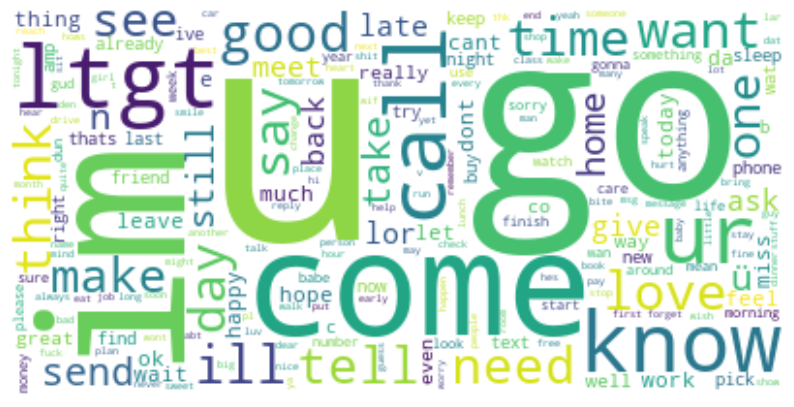

In [32]:
#Wordcloud for ham SMS

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham_words)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

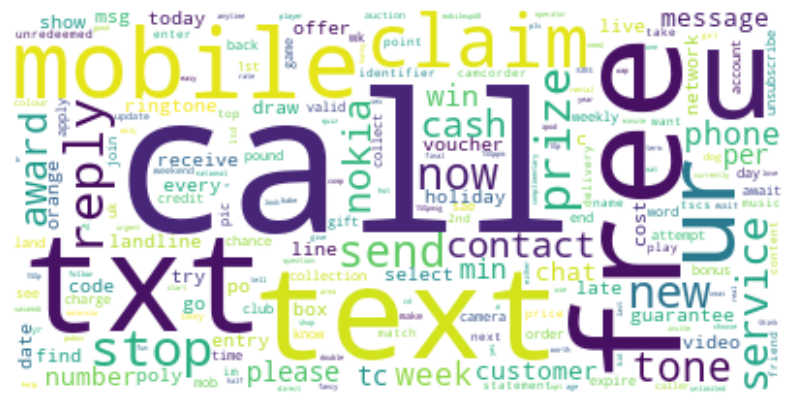

In [33]:
#Wordcloud for spam SMS
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam_words)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. Vectorization 

# a) Vectorization using TF

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#using count vectoroizer to create a document-term matrix
cv = CountVectorizer()

X = cv.fit_transform(df.sms)
X = X.toarray()

In [36]:
#The word list
names = cv.get_feature_names()

In [37]:
#Converting the document-term matrix to a dataframe

tf_matrix = pd.DataFrame(X, columns=names)

In [38]:
tf_matrix.head(3)

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# b) Vectorization using TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf_vectorizer = TfidfVectorizer()
tfidr_vectors = tfidf_vectorizer.fit_transform(df.sms)

names = tfidf_vectorizer.get_feature_names()

tfidr_vectors = tfidr_vectors.toarray()
tfidr_vectors = pd.DataFrame(tfidr_vectors, columns=names)

In [41]:
tfidr_vectors.head(3)

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# c) using Google’s word-to-vec model

In [42]:
import gensim

In [43]:
%%time
tokenized_data = df.sms.apply(lambda x: x.split()) # tokenizing 

Wall time: 4.98 ms


In [44]:
model_w2v = gensim.models.Word2Vec(
            tokenized_data,
            vector_size=300, # desired no. of features/independent variables
            window=3, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 0, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 3
) 

In [45]:
model_w2v.train(tokenized_data, total_examples= len(df), epochs=20)

(777438, 978880)

In [46]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [47]:
wordvec_arrays = np.zeros((len(tokenized_data), 300)) 
for i in range(len(tokenized_data)):
    wordvec_arrays[i,:] = word_vector(tokenized_data[i], 300)
wrd_embd_matrix = pd.DataFrame(wordvec_arrays)
wrd_embd_matrix.shape

(5125, 300)

In [48]:
wrd_embd_matrix.to_csv('wrd_embd_matrix.csv', index=False)

In [49]:
wrd_embd_matrix = pd.read_csv('wrd_embd_matrix.csv')

In [51]:
wrd_embd_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.068414,0.037721,-0.142991,0.144044,-0.170967,-0.007982,-0.025708,0.054199,-0.210966,-0.304985,...,0.192575,0.099711,-0.214944,0.018878,-0.022094,-0.017193,0.212139,-0.094874,-0.081272,0.007134
1,-0.019326,0.157434,-0.110206,0.181995,-0.179822,-0.054819,-0.084273,0.083943,-0.305799,-0.238121,...,0.187992,0.109289,-0.168091,-0.020270,-0.002044,-0.043219,0.172320,0.053154,-0.081931,0.051145
2,0.017486,-0.056898,-0.102946,-0.014909,-0.222711,-0.010265,0.095039,-0.020860,-0.312334,-0.447085,...,0.160909,0.101987,-0.354579,-0.049007,-0.062227,-0.067093,0.195475,-0.359862,-0.262959,-0.249534
3,0.005567,0.205956,-0.085030,0.175881,-0.272267,-0.038356,-0.147753,0.066445,-0.357868,-0.205424,...,0.206200,0.140927,-0.206555,-0.025697,-0.053455,-0.062462,0.148743,0.140102,-0.050722,0.126381
4,-0.157807,-0.102116,-0.142562,0.172875,-0.055558,-0.015242,-0.033104,0.033976,-0.169333,-0.337618,...,0.185768,0.059576,-0.268156,0.057075,0.110908,0.089482,0.271802,-0.084932,-0.065716,0.040488


# 5. Dimension Reduction 

### dropping texts that appear in less than p% of the documents. 

### For TF  Matrix   ( < 0.5%)

In [52]:
freq_col = []
for col in list(tf_matrix):
    prop = tf_matrix[col].sum()/tf_matrix.shape[0]
    if prop*100 >= 0.5:  
        freq_col.append(col)
len(freq_col)

340

In [53]:
tf_matrix = tf_matrix[freq_col]
tf_matrix.head(3)

,100,1000,150,150ppm,16,18,1st,2000,2nd,500,...,would,xxx,ya,yeah,year,yes,yet,yo,you,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### For TF-IDF Matrix   ( < 0.15%)

In [54]:
freq_col = []
for col in list(tfidr_vectors):
    prop = tfidr_vectors[col].sum()/tfidr_vectors.shape[0]
    if prop*100 >= 0.15:  
        freq_col.append(col)
        
len(freq_col)

343

In [55]:
tfidr_vectors = tfidr_vectors[freq_col]
tfidr_vectors.head(3)

,1000,18,2000,able,abt,account,actually,address,again,ah,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,you,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Dimension Reduction

# PCA 

In [56]:
from sklearn.decomposition import PCA

###  For TF vectors

In [57]:
pca = PCA()

In [58]:
pca_features = pca.fit_transform(tf_matrix)
pca_tfmatrix = pd.DataFrame(data=pca_features)

In [59]:
ind = np.sum(np.cumsum(np.round((pca.explained_variance_ratio_*100),1)) < 95.1)

In [60]:
pca_tfmatrix = pca_tfmatrix.iloc[:, :ind]
pca_tfmatrix.head(3)

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,0.624441,0.542128,-0.553270,0.425342,0.233898,-0.488573,-0.046699,0.070962,0.278113,-0.098826,...,-0.025644,0.087568,0.016213,-0.056504,0.012407,-0.031157,0.006015,0.023077,-0.046388,-0.023549
1,-0.019178,-0.259259,-0.013069,-0.127556,0.006844,-0.159573,-0.135349,-0.062369,0.140935,0.114230,...,0.051262,0.016138,0.039885,-0.078067,0.053480,-0.047235,0.011756,0.036939,0.049947,-0.074880
2,-0.374370,0.213497,-0.038196,-0.220137,0.372084,0.177407,-0.448017,0.864224,-0.453379,0.046741,...,0.171840,-0.110687,0.064741,0.113894,0.118652,0.041295,-0.067675,0.055490,0.038972,0.119776


### After PCA, 277 columns are explaining 95% variation of the TF Vector

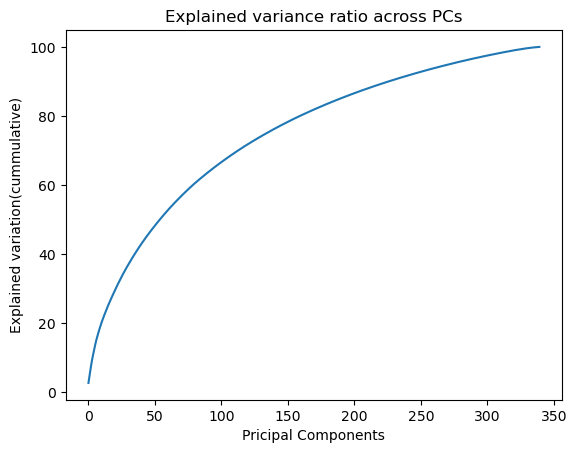

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100 )
plt.title('Explained variance ratio across PCs')
plt.xlabel('Pricipal Components')
plt.ylabel('Explained variation(cummulative)')
plt.show()

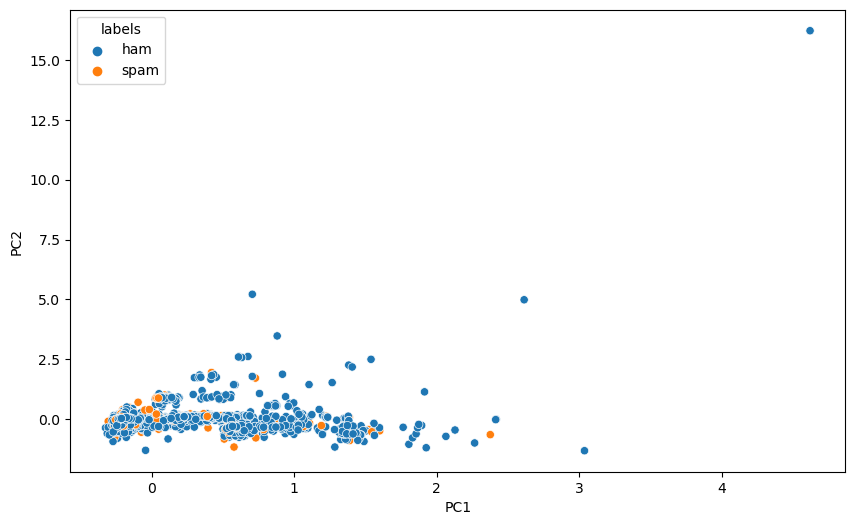

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(pca_tfmatrix[1], pca_tfmatrix[2], hue=emails['labels'], alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

###  For TF-IDF vectors

In [63]:
pca = PCA()

In [64]:
pca_features = pca.fit_transform(tfidr_vectors)
pca_tfidfmatrix = pd.DataFrame(data=pca_features)

In [65]:
ind = np.sum(np.cumsum(np.round((pca.explained_variance_ratio_*100),1)) < 95.1)

In [66]:
pca_tfidfmatrix = pca_tfidfmatrix.iloc[:, :ind]
pca_tfidfmatrix.head(3)

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,0.037564,-0.053778,0.028100,0.042637,-0.052950,0.091235,-0.032248,0.060080,0.015833,-0.009020,...,-0.021587,0.002233,-0.014597,-0.022697,0.001490,0.003720,0.035879,-0.035905,0.007337,0.011790
1,0.179209,0.121676,-0.126793,0.045288,-0.031882,-0.046455,-0.044683,-0.035492,-0.010150,-0.033714,...,0.023989,0.026173,-0.021838,-0.008003,-0.016152,0.012205,0.041607,0.029544,-0.043757,-0.031323
2,-0.044580,0.023345,-0.007986,0.010745,0.007401,0.026200,-0.000440,-0.035340,-0.039353,-0.051029,...,-0.016114,0.008147,-0.007819,-0.016693,0.037520,0.028537,0.042178,0.008107,-0.039913,-0.018645


### After PCA, 291 columns are explaining 95% variation of the TF-IDF Vector

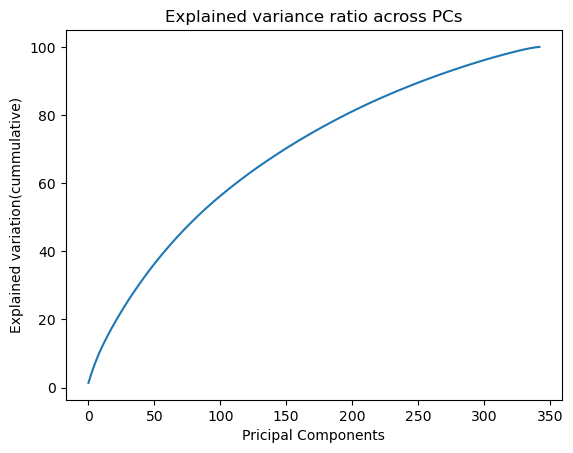

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100 )
plt.title('Explained variance ratio across PCs')
plt.xlabel('Pricipal Components')
plt.ylabel('Explained variation(cummulative)')
plt.show()

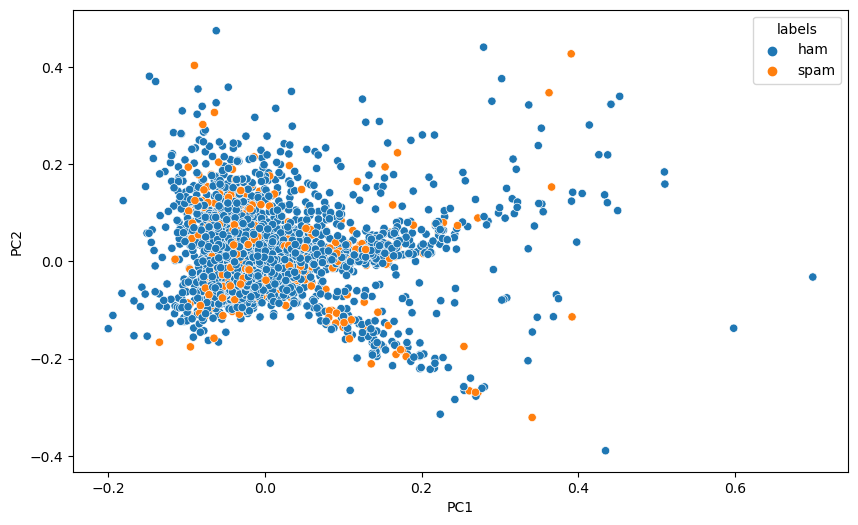

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(pca_tfidfmatrix[1], pca_tfidfmatrix[2], hue=emails['labels'], alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### For DocToVec vectors

In [69]:
pca = PCA()

In [70]:
pca_features = pca.fit_transform(wrd_embd_matrix)
pca_wrd_embd_matrix = pd.DataFrame(data=pca_features)

In [71]:
ind = np.sum(np.cumsum(np.round((pca.explained_variance_ratio_*100),1)) < 95.1)

In [72]:
pca_tfidfmatrix = pca_tfidfmatrix.iloc[:, :ind]
pca_tfidfmatrix.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.037564,-0.053778,0.028100,0.042637,-0.052950,0.091235,-0.032248,0.060080,0.015833,-0.009020
1,0.179209,0.121676,-0.126793,0.045288,-0.031882,-0.046455,-0.044683,-0.035492,-0.010150,-0.033714
2,-0.044580,0.023345,-0.007986,0.010745,0.007401,0.026200,-0.000440,-0.035340,-0.039353,-0.051029


### After PCA, 10 columns are explaining 95% variation of the DocToVec 

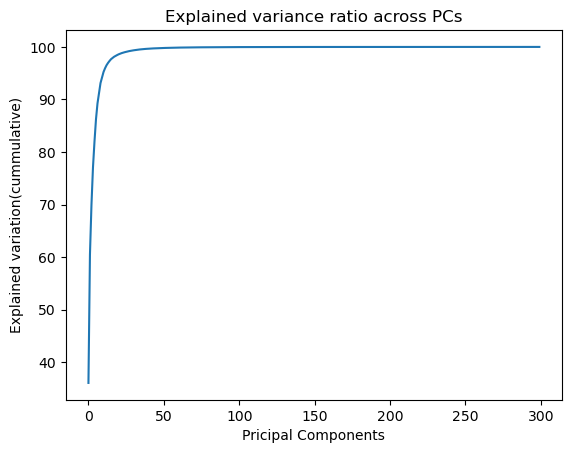

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100 )
plt.title('Explained variance ratio across PCs')
plt.xlabel('Pricipal Components')
plt.ylabel('Explained variation(cummulative)')
plt.show()

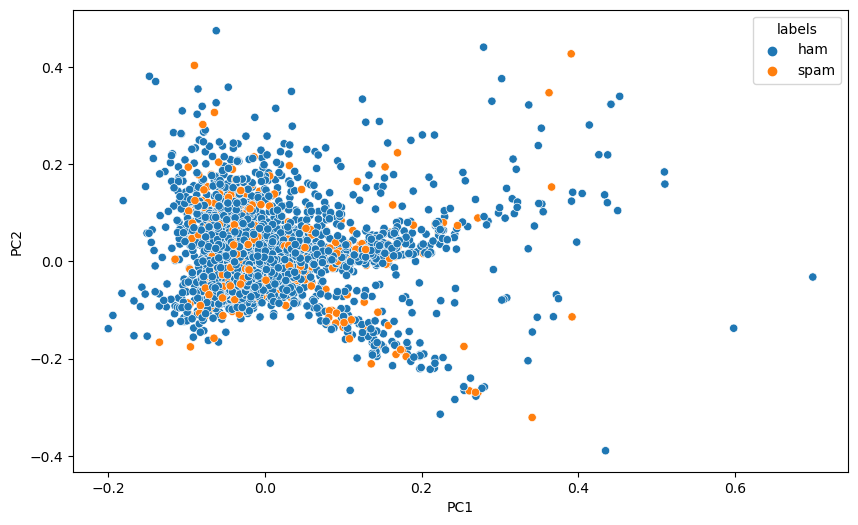

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(pca_tfidfmatrix[1], pca_tfidfmatrix[2], hue=emails['labels'], alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# 6. Model Fitting  

In [75]:
def performance_evaluation(y , y_pred, t = True):
    if t:
        print("Accuracy score of train data:", np.round(accuracy_score(y, y_pred)*100, 2))
        print("Recall score of train data:  ", np.round(recall_score(y, y_pred)*100, 2))
        print("Precision score of train data: ", np.round(precision_score(y, y_pred)*100, 2))
        print("F1 score of train data:      ", np.round(f1_score(y, y_pred)*100, 2))
    else:
        print("Accuracy score of test data:", np.round(accuracy_score(y, y_pred)*100, 2))
        print("Recall score of test data:  ", np.round(recall_score(y, y_pred)*100, 2))
        print("Precision score of test data: ", np.round(precision_score(y, y_pred)*100, 2))
        print("F1 score of test data:      ", np.round(f1_score(y, y_pred)*100, 2))

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

# Fitting different models for TF (without PCA)

### Converting spam to 1 and ham to 0 

In [81]:
y = np.where(df['labels'] == 'spam',1, 0) 

In [82]:
# Train Test Split

X = tf_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)

### 1. Logistic Regression

In [83]:
lrc = LogisticRegression().fit(X_train, y_train)

In [84]:
y_train_pred = lrc.predict(X_train)

In [85]:
y_pred = lrc.predict(X_test)

In [86]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.18
Recall score of test data:   72.78
Precision score of test data:  95.04
F1 score of test data:       82.44


In [257]:
performance_evaluation(y_test,y_pred)

Accuracy score of train data: 96.98
Recall score of train data:   81.75
Precision score of train data:  92.79
F1 score of train data:       86.92


### 2. Decision Tree

In [87]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [88]:
y_pred = dtc.predict(X_test)

In [89]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.24
Recall score of test data:   77.85
Precision score of test data:  82.55
F1 score of test data:       80.13


#### Pruning 

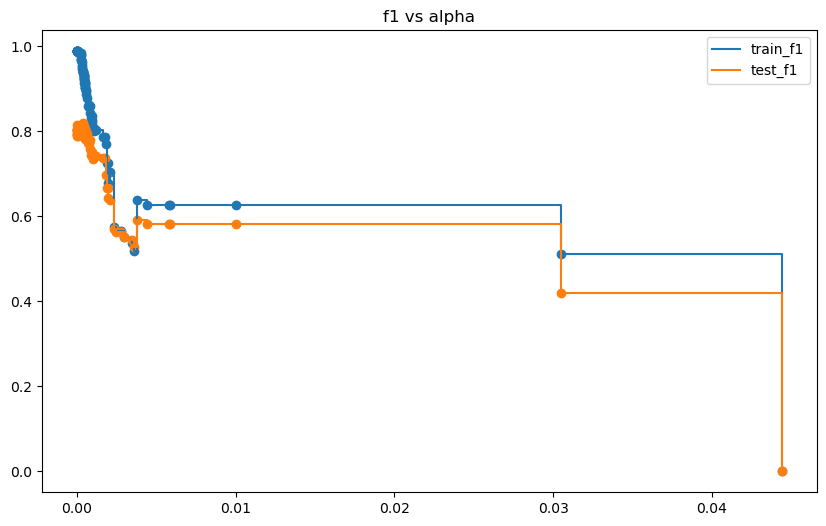

In [90]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [91]:
alpha = 0.01
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [735]:
y_train_pred = clf.predict(X_train)

In [736]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 90.48
Recall score of test data:   53.8
Precision score of test data:  63.43
F1 score of test data:       58.22


### 3. Random Forset 

In [737]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [738]:
y_pred = rfc.predict(X_test)

In [739]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.8
Recall score of test data:   79.11
Precision score of test data:  93.98
F1 score of test data:       85.91


### 4. KNN Classifier 

In [746]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [747]:
y_train_pred = knn.predict(X_train)

In [748]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 93.29
Recall score of train data:   46.2
Precision score of train data:  98.65
F1 score of train data:       62.93


### 5. AdaBoost 

In [749]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.22
Recall score of train data:   83.3
Precision score of train data:  93.36
F1 score of train data:       88.04


In [750]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.49
Recall score of test data:   77.22
Precision score of test data:  93.13
F1 score of test data:       84.43


In [751]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[ 0.01, 0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [752]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators=100).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.94
Recall score of train data:   86.47
Precision score of train data:  96.46
F1 score of train data:       91.19


In [753]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.57
Recall score of test data:   76.58
Precision score of test data:  94.53
F1 score of test data:       84.62


# -------------------------------------------------------------------------------------------

# Fitting different models for TF-IDF (without PCA)

In [92]:
X = tfidr_vectors
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)

### 1. Logistic Regression

In [93]:
lrc = LogisticRegression().fit(X_train, y_train)

In [94]:
y_train_pred = lrc.predict(X_train)

In [95]:
y_pred = lrc.predict(X_test)

In [96]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 93.56
Recall score of test data:   50.0
Precision score of test data:  95.45
F1 score of test data:       65.62


### 2. Decision Tree

In [97]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [98]:
y_pred = dtc.predict(X_test)

In [99]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 94.63
Recall score of train data:   77.78
Precision score of train data:  78.4
F1 score of train data:       78.09


#### Pruning 

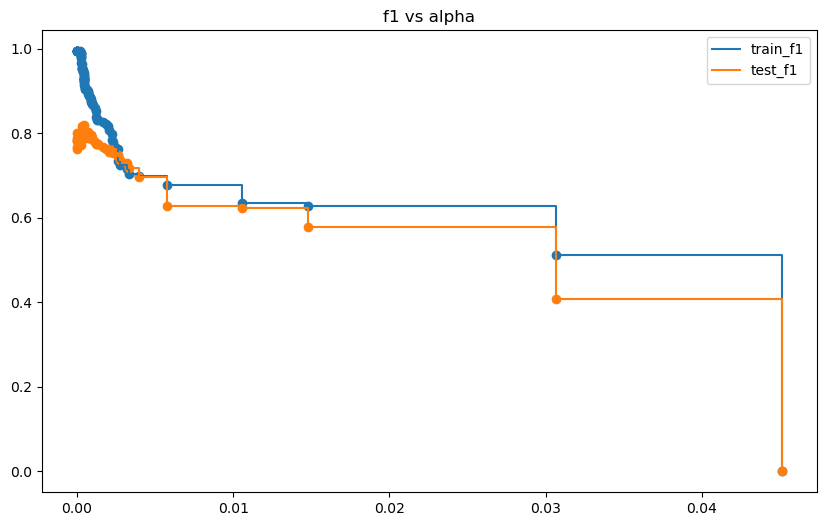

In [100]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [101]:
alpha = 0.005
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005)

In [102]:
y_train_pred = clf.predict(X_train)

In [103]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 92.78
Recall score of test data:   67.46
Precision score of test data:  72.03
F1 score of test data:       69.67


### 3. Random Forset 

In [104]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [105]:
y_pred = rfc.predict(X_test)

In [106]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.39
Recall score of test data:   80.16
Precision score of test data:  89.38
F1 score of test data:       84.52


### 5. AdaBoost 

In [107]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.44
Recall score of train data:   81.98
Precision score of train data:  96.73
F1 score of train data:       88.75


In [108]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.71
Recall score of test data:   75.4
Precision score of test data:  87.96
F1 score of test data:       81.2


In [109]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) 
CV_adc.fit(X_train, y_train)

CV_adc.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [110]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators=100).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.22
Recall score of train data:   88.51
Precision score of train data:  96.75
F1 score of train data:       92.45


In [111]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.41
Recall score of test data:   73.81
Precision score of test data:  86.92
F1 score of test data:       79.83


# -------------------------------------------------------------------------------------------------------------

# Fitting different models for DocToVec (without PCA)

In [112]:
X = wrd_embd_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)

### 1. Logistic Regression

In [113]:
lrc = LogisticRegression().fit(X_train, y_train)

In [114]:
y_train_pred = lrc.predict(X_train)

In [115]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 96.77
Recall score of train data:   82.45
Precision score of train data:  90.49
F1 score of train data:       86.28


In [116]:
y_pred = lrc.predict(X_test)

In [117]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.55
Recall score of test data:   74.05
Precision score of test data:  87.97
F1 score of test data:       80.41


### 2. Decision Tree

In [118]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [119]:
y_pred = dtc.predict(X_test)

In [120]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 94.15
Recall score of train data:   79.75
Precision score of train data:  74.56
F1 score of train data:       77.06


#### Pruning 

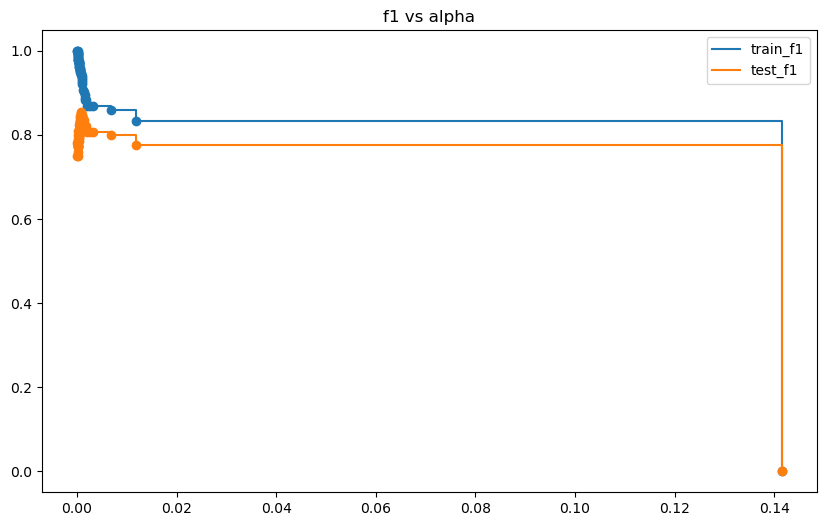

In [121]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [122]:
alpha = 0.005
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005)

In [123]:
y_train_pred = clf.predict(X_train)

In [124]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.71
Recall score of test data:   72.78
Precision score of test data:  90.55
F1 score of test data:       80.7


### 3. Random Forset 

In [125]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [126]:
y_pred = rfc.predict(X_test)

In [127]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.96
Recall score of test data:   82.28
Precision score of test data:  92.2
F1 score of test data:       86.96


### 4. KNN Classifier 

In [128]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [129]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.94
Recall score of train data:   89.85
Precision score of train data:  93.2
F1 score of train data:       91.5


In [130]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.1
Recall score of test data:   85.44
Precision score of test data:  83.33
F1 score of test data:       84.38


In [131]:
from sklearn.model_selection import cross_validate, StratifiedKFold

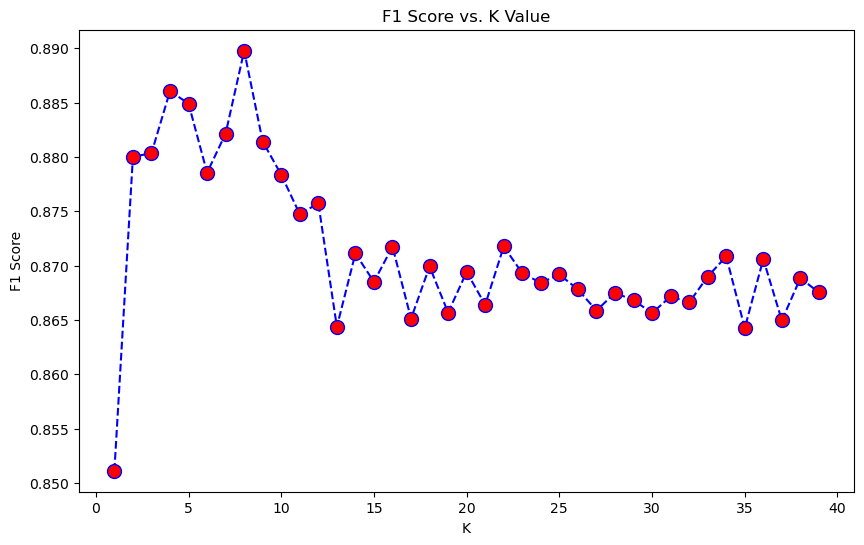

In [132]:
depth = np.arange(1,40)
mean_f1 = []

for k in depth:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric='euclidean')
    knn = cross_validate(estimator=knn_model, X=X_train,  y=y_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(knn['test_score']))

d = depth
f = mean_f1
plt.figure(figsize=(10,6))
plt.plot(d,f,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()

In [133]:
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

y_train_pred = knn.predict(X_train)


In [134]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.87
Recall score of test data:   81.01
Precision score of test data:  84.77
F1 score of test data:       82.85


###  Bagging

In [135]:
clf = BaggingClassifier().fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)

In [136]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.72
Recall score of test data:   81.01
Precision score of test data:  91.43
F1 score of test data:       85.91


In [137]:
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(recall_score(y_test, y_pred))

In [138]:
scores, models

([0.7215189873417721,
  0.7531645569620253,
  0.7784810126582279,
  0.7658227848101266,
  0.8037974683544303,
  0.8291139240506329,
  0.8037974683544303,
  0.8354430379746836],
 [BaggingClassifier(n_estimators=2),
  BaggingClassifier(n_estimators=4),
  BaggingClassifier(n_estimators=6),
  BaggingClassifier(n_estimators=8),
  BaggingClassifier(),
  BaggingClassifier(n_estimators=12),
  BaggingClassifier(n_estimators=14),
  BaggingClassifier(n_estimators=16)])

In [139]:
clf = BaggingClassifier(n_estimators=12).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)


In [140]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.41
Recall score of test data:   77.85
Precision score of test data:  91.79
F1 score of test data:       84.25


# ---------------------------------------------------------------------------------------------------------------

# Fitting different models for TF (with PCA)

In [141]:
X = pca_tfmatrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3, stratify=y)

### 1. Logistic Regression

In [142]:
lrc = LogisticRegression().fit(X_train, y_train)

In [143]:
y_train_pred = lrc.predict(X_train)

In [144]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.8
Recall score of train data:   83.37
Precision score of train data:  98.59
F1 score of train data:       90.34


In [145]:
y_pred = lrc.predict(X_test)

In [146]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 97.07
Recall score of test data:   83.33
Precision score of test data:  92.11
F1 score of test data:       87.5


### 2. Decision Tree

In [147]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [148]:
y_pred = dtc.predict(X_test)

In [149]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 93.56
Recall score of test data:   78.57
Precision score of test data:  71.74
F1 score of test data:       75.0


#### Pruning 

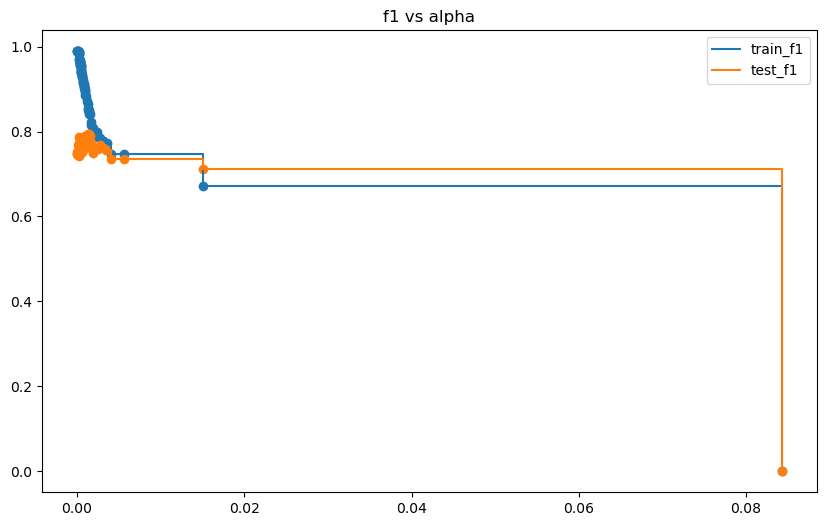

In [150]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [151]:
alpha = 0.01
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [152]:
y_train_pred = clf.predict(X_train)

In [153]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 94.24
Recall score of test data:   65.08
Precision score of test data:  84.54
F1 score of test data:       73.54


### 3. Random Forset 

In [154]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [155]:
y_pred = rfc.predict(X_test)

In [156]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.9
Recall score of test data:   67.46
Precision score of test data:  98.84
F1 score of test data:       80.19


### 4. KNN Classifier 

In [157]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [158]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 95.41
Recall score of train data:   63.96
Precision score of train data:  98.18
F1 score of train data:       77.46


### 5. AdaBoost 

In [159]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)

In [160]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.39
Recall score of train data:   78.57
Precision score of train data:  90.83
F1 score of train data:       84.26


In [161]:
adc= AdaBoostClassifier(learning_rate= 1, n_estimators=100 ).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.85
Recall score of train data:   91.29
Precision score of train data:  99.35
F1 score of train data:       95.15


In [162]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.29
Recall score of train data:   80.16
Precision score of train data:  88.6
F1 score of train data:       84.17


### Gradient Boosting

In [163]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [164]:
clf = HistGradientBoostingClassifier(random_state=0)

# Fit the classifier on the training data
clf.fit(X_train, y_train)


HistGradientBoostingClassifier(random_state=0)

In [165]:
y_train_pred = clf.predict(X_train)

In [166]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.78
Recall score of train data:   80.16
Precision score of train data:  92.66
F1 score of train data:       85.96


# -------------------------------------------------------------------------------------------------------------- 

# Fitting different models for TF-IDF (with PCA) 

In [189]:
X = pca_tfidfmatrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)

### 1. Logistic Regression

In [190]:
lrc = LogisticRegression().fit(X_train, y_train)

In [191]:
y_train_pred = lrc.predict(X_train)

In [192]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 89.17
Recall score of train data:   18.02
Precision score of train data:  75.21
F1 score of train data:       29.07


In [193]:
y_pred = lrc.predict(X_test)

In [194]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 88.78
Recall score of test data:   13.49
Precision score of test data:  73.91
F1 score of test data:       22.82


### 2. Decision Tree

In [195]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [196]:
y_pred = dtc.predict(X_test)

In [197]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 90.63
Recall score of train data:   65.08
Precision score of train data:  61.19
F1 score of train data:       63.08


#### Pruning 

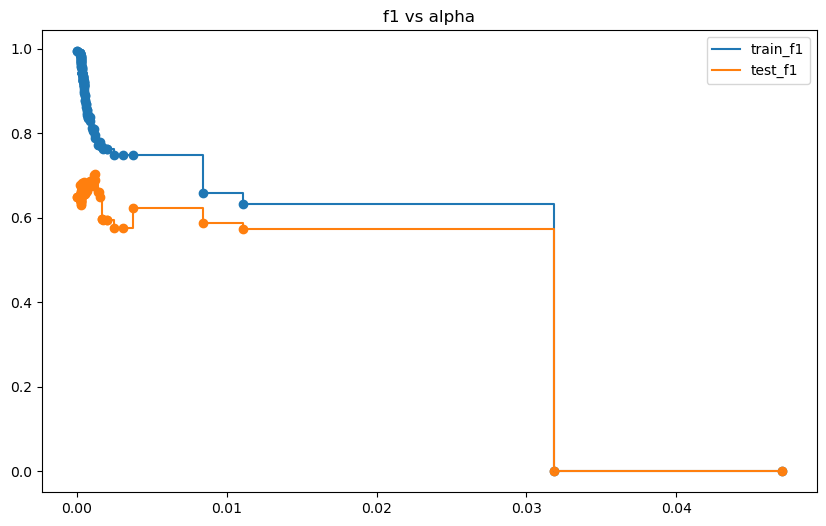

In [198]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [199]:
alpha = 0.005
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005)

In [200]:
y_train_pred = clf.predict(X_train)

In [201]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 91.41
Recall score of test data:   57.94
Precision score of test data:  67.59
F1 score of test data:       62.39


### 3. Random Forset 

In [202]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [203]:
y_pred = rfc.predict(X_test)

In [204]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 93.95
Recall score of test data:   63.49
Precision score of test data:  83.33
F1 score of test data:       72.07


### 5. AdaBoost 

In [205]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 95.15
Recall score of train data:   73.27
Precision score of train data:  85.25
F1 score of train data:       78.81


In [206]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 91.51
Recall score of train data:   60.32
Precision score of train data:  67.26
F1 score of train data:       63.6


In [207]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[ 0.01, 0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [208]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators=100).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 95.83
Recall score of train data:   77.43
Precision score of train data:  87.28
F1 score of train data:       82.06


In [209]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 91.51
Recall score of train data:   61.9
Precision score of train data:  66.67
F1 score of train data:       64.2


# ---------------------------------------------------------------------------------------------------------------

# Fitting different models for DocToVec (with PCA)

In [210]:
X = pca_wrd_embd_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)

### 1. Logistic Regression

In [211]:
lrc = LogisticRegression().fit(X_train, y_train)

In [212]:
y_train_pred = lrc.predict(X_train)

In [213]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 96.71
Recall score of train data:   81.78
Precision score of train data:  90.57
F1 score of train data:       85.95


In [214]:
y_pred = lrc.predict(X_test)

In [215]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.51
Recall score of test data:   75.4
Precision score of test data:  86.36
F1 score of test data:       80.51


### 2. Decision Tree

In [216]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [217]:
y_pred = dtc.predict(X_test)

In [218]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 93.85
Recall score of train data:   80.16
Precision score of train data:  72.66
F1 score of train data:       76.23


#### Pruning 

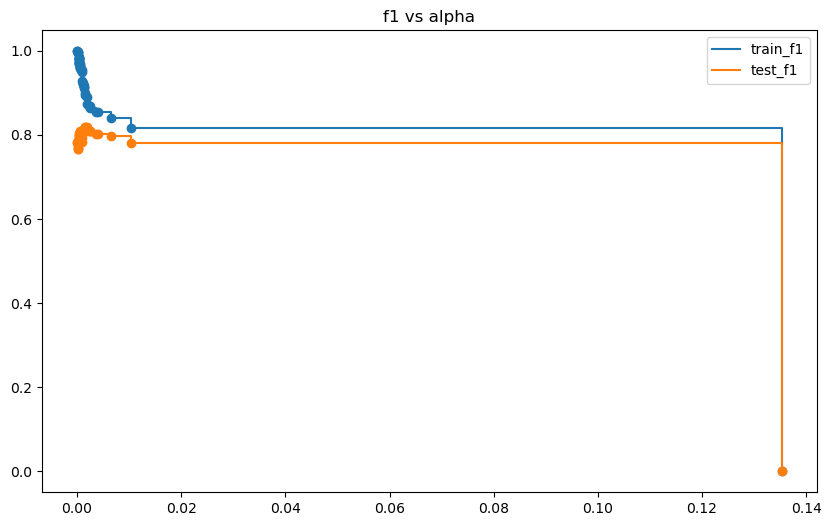

In [219]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [220]:
alpha = 0.01

clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [221]:
y_train_pred = clf.predict(X_train)

In [222]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.32
Recall score of test data:   75.4
Precision score of test data:  84.82
F1 score of test data:       79.83


### 3. Random Forset 

In [223]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [224]:
y_pred = rfc.predict(X_test)

In [225]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.9
Recall score of test data:   69.84
Precision score of test data:  95.65
F1 score of test data:       80.73


### 4. KNN Classifier 

In [226]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [227]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.95
Recall score of train data:   90.5
Precision score of train data:  92.7
F1 score of train data:       91.58


In [228]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.61
Recall score of test data:   84.13
Precision score of test data:  80.92
F1 score of test data:       82.49


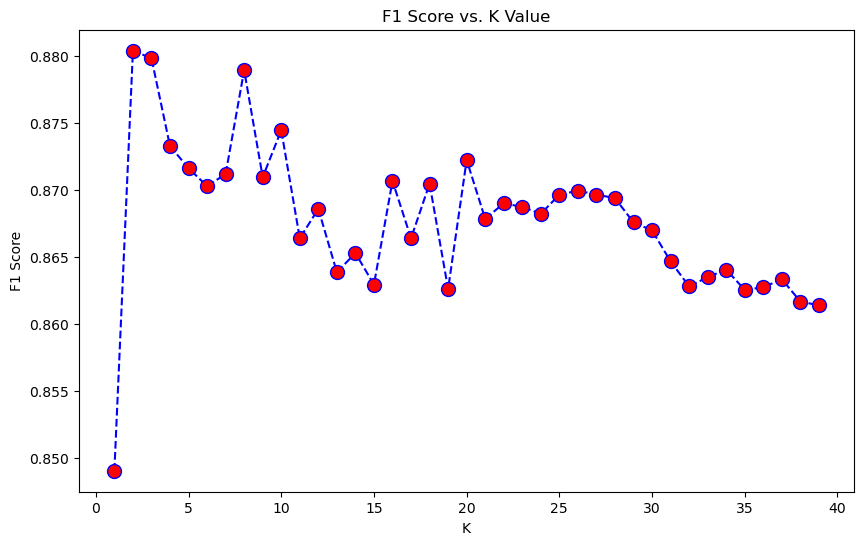

In [229]:
depth = np.arange(1,40)
mean_f1 = []

for k in depth:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric='euclidean')
    knn = cross_validate(estimator=knn_model, X=X_train,  y=y_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(knn['test_score']))

d = depth
f = mean_f1
plt.figure(figsize=(10,6))
plt.plot(d,f,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()

In [230]:
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

y_train_pred = knn.predict(X_train)


In [231]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.2
Recall score of test data:   80.16
Precision score of test data:  87.83
F1 score of test data:       83.82


### 5. AdaBoost 

In [232]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.83
Recall score of train data:   92.48
Precision score of train data:  97.9
F1 score of train data:       95.11


In [233]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 97.07
Recall score of train data:   84.92
Precision score of train data:  90.68
F1 score of train data:       87.7


In [234]:
param_grid = { 
    'n_estimators': [50, 100],
    'learning_rate' :[0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [235]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators= 100).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)

In [265]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 97.17
Recall score of train data:   83.33
Precision score of train data:  92.92
F1 score of train data:       87.87


###  Bagging

In [267]:
clf = BaggingClassifier().fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)

In [268]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.49
Recall score of test data:   77.78
Precision score of test data:  92.45
F1 score of test data:       84.48


In [239]:
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(recall_score(y_test, y_pred))

In [240]:
clf = BaggingClassifier(n_estimators=16).fit(X_train, y_train)


In [241]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.68
Recall score of test data:   80.16
Precision score of test data:  91.82
F1 score of test data:       85.59


In [242]:

base_clf = DecisionTreeClassifier()

# Define the bagging classifier
bagging = BaggingClassifier(base_estimator=base_clf)

# Define the hyperparameter grid for grid search
param_grid = {'n_estimators': [10, 20, 30],
              'max_samples': [0.5, 0.7, 1.0],
              'max_features': [0.5, 0.7, 1.0]}

# Create the grid search object
grid_search = GridSearchCV(bagging, param_grid, cv=5)

# Fit the grid search on the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 30}


In [255]:
clf = BaggingClassifier(n_estimators=30).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)

In [256]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.98
Recall score of test data:   81.75
Precision score of test data:  92.79
F1 score of test data:       86.92


### Support Vector Classifier

In [245]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

clf.fit(X_train, y_train)

SVC()

In [246]:
y_train_pred = clf.predict(X_train)

In [247]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.85
Recall score of train data:   85.35
Precision score of train data:  96.85
F1 score of train data:       90.74


In [248]:
y_pred = clf.predict(X_test)

In [249]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.98
Recall score of train data:   80.16
Precision score of train data:  94.39
F1 score of train data:       86.7


In [250]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True)

# fitting the model for grid search
grid.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [260]:
y_train_pred = clf.predict(X_train)

In [261]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.9
Recall score of train data:   99.41
Precision score of train data:  99.8
F1 score of train data:       99.6


In [262]:
y_pred = clf.predict(X_test)

In [263]:
performance_evaluation(y_test, y_pred,False)

Accuracy score of test data: 96.98
Recall score of test data:   81.75
Precision score of test data:  92.79
F1 score of test data:       86.92


# By looking into f1 score and model complexity, Adaboost Classifier on DocToVec for PCA data is performing the best out of all competing models. 

## The test score is as below:


### Accuracy : 97.17
### Recall      : 83.33
### Precision : 92.92
### f1 score    : 87.87